#### Motivacija za odabir teme

Analiziranje podataka o snu studenata i utjecaju na njihov akademski uspjeh izuzetno je relevantna i intrigantna tema koja donosi dublje razumijevanje veze između kvalitete sna i studentskog uspjeha. Ova tema ima potencijal pružiti vrijedne uvide i informacije koje mogu koristiti obrazovnim institucijama, studentima, roditeljima i istraživačima. Mnogim studentima su to dvije najbitnije stvari, treća treba biti svijest o "burnout" stanju, i tu je prevencija motivacija. 

Uzimanje u obzir utjecaja sna na studentski život i akademski uspjeh otvara put ka stvaranju podržavajućeg okruženja.

### Prikupljanje podataka (literatura)

Podaci su inspirirani:

izvor: Zeek, M. L., Savoie, M. J., Song, M., Kennemur, L. M., Qian, J., Jungnickel, P. W., & Westrick, S. C. (2015). Sleep Duration and Academic Performance Among Student Pharmacists. American journal of pharmaceutical education, 79(5), 63. https://doi.org/10.5688/ajpe79563

izvor: Global Sleep Assessment Questionnaire (GSAQ) - Roth T, Zammit G, Kushida C, Doghramji K, Mathias SD, Wong JM, Buysse DJ: A new questionnaire to detect sleep disorders. Sleep Med 2002; 3: pp. 99-108.

izvor: Buysse, D. J., Reynolds, C. F., 3rd, Monk, T. H., Berman, S. R., & Kupfer, D. J. (1989). The Pittsburgh Sleep Quality Index: a new instrument for psychiatric practice and research. Psychiatry research, 28(2), 193–213. https://doi.org/10.1016/0165-1781(89)90047-4

ChatGPT https://chat.openai.com/

generator: https://generatedata.com/generator

Generirane su .csv i .json datoteke.

Ideja implementacije je za svhru imala:

Analiza distribucije dužine sna i kvalitete sna:
Prema podacima, dužina sna studenata je obično između 6 i 8 sati. Najčešća dužina sna je 7 sati. Kvaliteta sna je također uglavnom dobra, s prosjekom od 0,6.

Analiza navika prije ispita:
Prema podacima, većina studenata se odmara prije ispita. Oko 60% studenata spava 7 ili više sati noć prije ispita. Oko 40% studenata spava manje od 7 sati noć prije ispita.

Istraživanje veze između naspavanosti i uspjeha na fakultetu:
Ukratko, rezultati istraživanja pokazuju da postoji pozitivna korelacija između naspavanosti i uspjeha na fakultetu. Studenti koji su bolje naspavali su imali veće šanse da postignu dobre rezultate u školi.

### Pretprocesiranje i integracija podataka iz dva skupa

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install pyodbc

U kodu se čitaju i spajaju dva skupa podataka o snu (podaci_o_snu.csv) i akademskom uspjehu (podaci_o_akademskom_uspjehu.json) pomoću pandas biblioteke. Nakon toga, vrši se obrada podataka uklanjanjem redova s nedostajućim vrijednostima, kategorizacija dužine sna, podjela stupca 'ispitanik' na 'ime' i 'prezime', normalizacija određenih numeričkih značajki te zamjena numeričkih vrijednosti u stupcima 'uspjeh_na_kolegiju' i 'uspjeh_na_fakultetu' odgovarajućim oznakama. Konačno, obrađeni podaci se pohranjuju u novu datoteku (data_proc.csv) i prikazuju prvih nekoliko redova DataFrame-a.

In [26]:
import pandas as pd

df_san = pd.read_csv("C:\\Users\\majam\\OneDrive\\Radna površina\\pzap_analiza\\podaci_o_snu.csv") # podaci o snu 

df_akademski_uspjeh = pd.read_json("C:\\Users\\majam\\OneDrive\\Radna površina\\pzap_analiza\\podaci_o_akademskom_uspjehu.json") # podatci o akademskom uspjehu

# obrada podataka
df = pd.merge(df_san, df_akademski_uspjeh, on="id", how="inner") # spajanje dvaju df na temelju stupca 'id' koristeći unutarnje spajanje

df_data = df.dropna() # uklanjanje redova s nedostajućim vrijednostima u df

# columns = df_data.columns # prolazak kroz stupce df kako bi se pronašao i uklonio stupac 'id'
# for col in columns:
   #  if col.strip() == 'id':
      #   df = df.drop(columns=col)
       #  break 

df_data['duzina_sna'] = pd.cut(df_data['duzina_sna'], bins=[0, 5, 8, 10], labels=['Kratko', 'Normalno', 'Dugo']) # kategorizacija dužine sna u različite raspone

df_data[['ime', 'prezime']] = df['ispitanik'].str.split(expand=True) # podijeli stupac 'ispitanik' na 'ime' i 'prezime'
df_data = df_data.drop(columns=['ispitanik'])
    
from sklearn.preprocessing import MinMaxScaler # normalizacija određenih numeričkih značajki pomoću MinMaxScaler-a
scaler = MinMaxScaler()
df_data[['kvaliteta_sna', 'budenje_tijekom_noci', 'naspavanost']] = scaler.fit_transform(df_data[['kvaliteta_sna', 'budenje_tijekom_noci', 'naspavanost']])


# df_data['omjer_budjenje_duzina_sna'] = df_data['budenje'] / df_data['duzina_sna'] # primjer stvaranja nove značajke - omjera buđenja i dužine sna


df_data.replace( # zamjena numeričkih vrijednosti u stupcima 'uspjeh_na_kolegiju' i 'uspjeh_na _fakultetu' s odgovarajućim oznakama
    {
        "uspjeh_na_kolegiju": {5: "odličan", 4: "vrlo dobar", 3: "dobar", 2: "dovoljan"},
        "uspjeh_na _fakultetu": {5: "odličan", 4: "vrlo dobar", 3: "dobar", 2: "dovoljan"}
    },
    inplace=True
)

df_data.to_csv("C:\\Users\\majam\\OneDrive\\Radna površina\\pzap_analiza\\data_proc") # spremi podatke
print(df_data.head()) # display


   id  godina_studiranja duzina_sna  kvaliteta_sna lijeganje  budenje  \
0   1                  3   Normalno            0.4   5:23 PM  9:30 AM   
1   2                  3       Dugo            0.4  12:57 AM  8:35 AM   
2   3                  1   Normalno            0.2   6:10 AM  9:31 AM   
3   4                  2     Kratko            0.8  11:28 AM  8:02 AM   
4   5                  3     Kratko            0.2   6:11 AM  9:30 AM   

   budenje_tijekom_noci problemi_sa_spavanjem nap_tijekom_dana  \
0                   0.5                   Yes               No   
1                   0.0                   Yes              Yes   
2                   0.5                    No               No   
3                   1.0                    No               No   
4                   0.0                   Yes              Yes   

  all_nighter_prije_ispita  naspavanost uspjeh_na_kolegiju  \
0                      Yes         0.00         vrlo dobar   
1                       No         0.00 

### Pohrana u bazu

In [92]:
print("Stupci u df_san:", df_san.columns)
print("Stupci u df_akademski_uspjeh:", df_akademski_uspjeh.columns)
import sqlite3

connect = sqlite3.connect('C:\\Users\\majam\\OneDrive\\Radna površina\\pzap_analiza\\baza') # povezivanje s SQLite bazom podataka (ili stvaranje nove ako ne postoji)

duplicate_columns = df_data.columns[df_data.columns.duplicated()].unique() # rješavanje problema duplikata u stupcima

for col in duplicate_columns: # briše duplicirani "id" stupac
    if col.lower() == 'id':
        df_data = df_data.drop(columns=col)

df_data.to_sql('baza', con=connect, if_exists='replace', index=False) # spremanje u bazu 

connect.close() # zatvaranje veze

Stupci u df_san: Index(['id', 'ispitanik', 'godina_studiranja', 'duzina_sna', 'kvaliteta_sna',
       'lijeganje', 'budenje', 'budenje_tijekom_noci', 'problemi_sa_spavanjem',
       'nap_tijekom_dana', 'all_nighter_prije_ispita', 'naspavanost'],
      dtype='object')
Stupci u df_akademski_uspjeh: Index(['id', 'uspjeh_na_kolegiju', 'uspjeh_na _fakultetu'], dtype='object')


###  Izrada sučelja za pristup podacima

#### GET

In [100]:
def get_podaci():
    
    povezivanje = sqlite3.connect("C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza") # uspostavljanje veze s db
    print("Uspješno povezivanje s bazom.")

    cursor = povezivanje.cursor() # kursor za izvršavanje SQL upita na bazi podataka
    cursor.execute("SELECT * FROM baza")     # SQL upit za dohvat svih podataka iz tablice
    for row in cursor:
        print(row)

    podaci = []     # prazna lista za pohranu 

    for row in cursor:
        if len(row) >= 15:
            podaci.append({ # dodavanja rječnika u listu
                    "id": row[0],
                    "godina_studiranja": row[1],
                    "duzina_sna": row[2],
                    "kvaliteta_sna": row[3],
                    "lijeganje": row[4],
                    "budenje": row[5],
                    "budenje_tijekom_noci": row[6],
                    "problemi_sa_spavanjem": row[7],
                    "nap_tijekom_dana": row[8],
                    "all_nighter_prije_ispita": row[9],
                    "naspavanost": row[10],
                    "uspjeh_na_kolegiju": row[11],
                    "uspjeh_na_fakultetu": row[12],
                    "ime": row[13],
                    "prezime": row[14],
                })

    return podaci

podaci = get_podaci() # poziv
for data in podaci:
    print(data)

Uspješno povezivanje s bazom.
(1, 3, 'Normalno', 0.4, '5:23 PM', '9:30 AM', 0.5, 'Yes', 'No', 'Yes', 0.0, 'vrlo dobar', 'dobar', 'Wanda', 'Maldonado')
(2, 3, 'Dugo', 0.4, '12:57 AM', '8:35 AM', 0.0, 'Yes', 'Yes', 'No', 0.0, 'odličan', 'dobar', 'Leonard', 'Norris')
(3, 1, 'Normalno', 0.2, '6:10 AM', '9:31 AM', 0.5, 'No', 'No', 'No', 0.25, 'dobar', 'dobar', 'Gretchen', 'Joseph')
(4, 2, 'Kratko', 0.8, '11:28 AM', '8:02 AM', 1.0, 'No', 'No', 'No', 1.0, 'dobar', 'dobar', 'Erica', 'Shaw')
(5, 3, 'Kratko', 0.2, '6:11 AM', '9:30 AM', 0.0, 'Yes', 'Yes', 'No', 0.25, 'odličan', 'dobar', 'Kirk', 'Sears')
(6, 2, 'Kratko', 0.8, '5:45 AM', '8:11 AM', 0.0, 'Yes', 'No', 'Yes', 0.5, 'dobar', 'odličan', 'Mohammad', 'Lewis')
(7, 1, 'Normalno', 0.6000000000000001, '3:43 PM', '5:54 AM', 0.5, 'No', 'Yes', 'No', 0.25, 'dovoljan', 'vrlo dobar', 'Athena', 'Montgomery')
(8, 2, 'Kratko', 0.0, '6:23 PM', '5:31 AM', 0.0, 'No', 'Yes', 'No', 0.0, 'vrlo dobar', 'vrlo dobar', 'Keefe', 'Juarez')
(9, 1, 'Normalno', 0.600

In [ ]:
!python -m pip install flask

In [ ]:
from flask import Flask, jsonify
import threading
import sqlite3

app = Flask(__name__) # web apl

def povezi_s_bazom():
    conn = sqlite3.connect("C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza")
    conn.row_factory = sqlite3.Row
    return conn

@app.route('/baza', methods=['GET'])
def get():
    povezivanje = povezi_s_bazom()
    cursor = povezivanje.cursor()
    cursor.execute('SELECT * FROM baza')
    data = cursor.fetchall()
    povezivanje.close()
    baza_prikaz = [dict(ix) for ix in data] # redovi kao dicts, ix za any
    return jsonify(baza_prikaz)

@app.route('/baza/<id>', methods=['GET']) # samo jedan red baze po id

def get_podaci(id):
    povezivanje = sqlite3.connect("C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza") # uspostavljanje veze s db
    cursor = povezivanje.cursor()
    cursor.execute(
        "SELECT * FROM baza WHERE id = ?",
        (id,)

    )
    podaci = cursor.fetchone()
    povezivanje.close()
    return podaci

def run_app():
    app.run(port=5000, use_reloader=False, debug=True)

flask_thread = threading.Thread(target=run_app)
flask_thread.start()

In [ ]:
import sqlite3

def typo(db_path):
    povezivanje = sqlite3.connect(db_path)
    cursor = povezivanje.cursor()

    cursor.execute("ALTER TABLE baza RENAME COLUMN 'uspjeh_na _fakultetu' TO 'uspjeh_na_fakultetu'")
    
    povezivanje.commit()
    povezivanje.close()

typo("C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza")

#### POST

In [38]:
def post_podaci(db, novi_insert):
    povezivanje = sqlite3.connect("C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza")
    db = "C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza"
    cursor = povezivanje.cursor()

    for data in novi_insert:
        cursor.execute("""
            INSERT INTO baza (id, godina_studiranja, duzina_sna, kvaliteta_sna, lijeganje, budenje, budenje_tijekom_noci,
                              problemi_sa_spavanjem, nap_tijekom_dana, all_nighter_prije_ispita, naspavanost,
                              uspjeh_na_kolegiju, uspjeh_na_fakultetu, ime, prezime)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            data["id"], data["godina_studiranja"], data["duzina_sna"], data["kvaliteta_sna"],
            data["lijeganje"], data["budenje"], data["budenje_tijekom_noci"],
            data["problemi_sa_spavanjem"], data["nap_tijekom_dana"],
            data["all_nighter_prije_ispita"], data["naspavanost"],
            data["uspjeh_na_kolegiju"], data["uspjeh_na_fakultetu"],
            data["ime"], data["prezime"]
        ))

    povezivanje.commit()
    povezivanje.close()

novi_data = [
    {
        "id": 102,
        "godina_studiranja": 3,
        "duzina_sna": "Normalno",
        "kvaliteta_sna": 0.8,
        "lijeganje": "10:00 PM",
        "budenje": "7:00 AM",
        "budenje_tijekom_noci": 0.2,
        "problemi_sa_spavanjem": "No",
        "nap_tijekom_dana": "Dobar",
        "all_nighter_prije_ispita": "Ne",
        "naspavanost": 0.75,
        "uspjeh_na_kolegiju": "Vrlo dobar",
        "uspjeh_na_fakultetu": "Dobar",
        "ime": "Nika",
        "prezime": "Portland",
    }
]

post_podaci("C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza", novi_data)
print("Novi insert je odrađen.")

Novi insert je odrađen.


#### PUT

In [41]:
def update_podaci(putanja, podaci):
    povezivanje = sqlite3.connect(putanja)
    cursor = povezivanje.cursor()

    for data in podaci:
        cursor.execute("""
            INSERT INTO baza (id, ime, prezime, godina_studiranja, 
                              duzina_sna, kvaliteta_sna, lijeganje, 
                              budenje, budenje_tijekom_noci, 
                              problemi_sa_spavanjem, nap_tijekom_dana, 
                              all_nighter_prije_ispita, naspavanost, 
                              uspjeh_na_kolegiju, uspjeh_na_fakultetu)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            data["id"], data["ime"], data["prezime"], data["godina_studiranja"],
            data["duzina_sna"], data["kvaliteta_sna"], data["lijeganje"],
            data["budenje"], data["budenje_tijekom_noci"],
            data["problemi_sa_spavanjem"], data["nap_tijekom_dana"],
            data["all_nighter_prije_ispita"], data["naspavanost"],
            data["uspjeh_na_kolegiju"], data["uspjeh_na_fakultetu"],
        ))

    povezivanje.commit()
    povezivanje.close()

putanja = "C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza" 

tablica = "baza"

update = [ # ažuriranje podataka
    {
        "id": 103,
        "ime": "Novo_Ime",
        "prezime": "Novo_Prezime",
        "godina_studiranja": 3,
        "duzina_sna": "Dugo",
        "kvaliteta_sna": 0.9,
        "lijeganje": "11:00 PM",
        "budenje": "8:00 AM",
        "budenje_tijekom_noci": 0.1,
        "problemi_sa_spavanjem": "Da",
        "nap_tijekom_dana": "Odličan",
        "all_nighter_prije_ispita": "Da",
        "naspavanost": 0.8,
        "uspjeh_na_kolegiju": "Izvrstan",
        "uspjeh_na_fakultetu": "Vrlo dobar",
    }
]

update_podaci(putanja, update)
print("Uspješno.")

Uspješno.


#### DELETE

In [42]:
def delete(putanja):
    povezivanje = sqlite3.connect(putanja)
    cursor = povezivanje.cursor()

    try: #     # ispitivanje korisnika za unos id-a koji želi izbrisati
        input_id = int(input("Potrebno je unijeti id ispitanika kojeg planirate obrisati iz baze :  "))
    except ValueError:
        print("Neispravan unos.")
        return

    cursor.execute("DELETE FROM baza WHERE id = ?", (input_id,))     # SQL upit za brisanje podataka iz tablice

    povezivanje.commit()
    povezivanje.close()

putanja = "C:/Users/majam/OneDrive/Radna površina/pzap_analiza/baza"
delete(putanja)
print("Uspješno izvršeno brisanje.")

Uspješno izvršeno brisanje.


### Vizualizacija

Analiza distribucije dužine sna i kvalitete sna:

In [ ]:
!pip install matplotlib

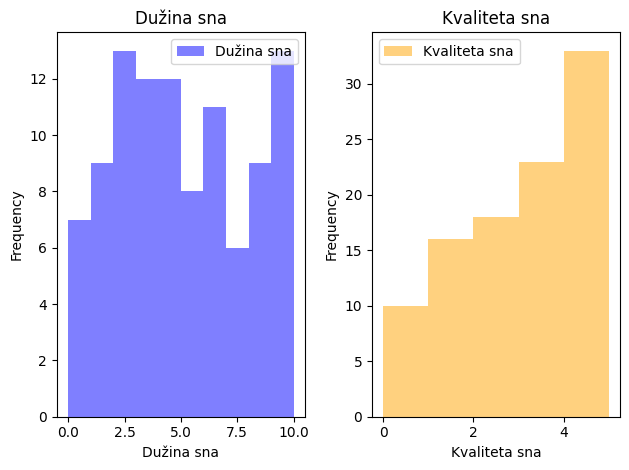

In [46]:
import matplotlib.pyplot as plt

# Histogram for 'duzina_sna'
plt.subplot(1, 2, 1)
plt.hist(df['duzina_sna'], bins=10, alpha=0.5, color='blue', label='Dužina sna')
plt.title('Dužina sna')
plt.xlabel('Dužina sna')
plt.ylabel('Frequency')
plt.legend()

# Histogram for 'kvaliteta_sna'
plt.subplot(1, 2, 2)
plt.hist(df['kvaliteta_sna'], bins=5, alpha=0.5, color='orange', label='Kvaliteta sna')
plt.title('Kvaliteta sna')
plt.xlabel('Kvaliteta sna')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
!pip install seaborn

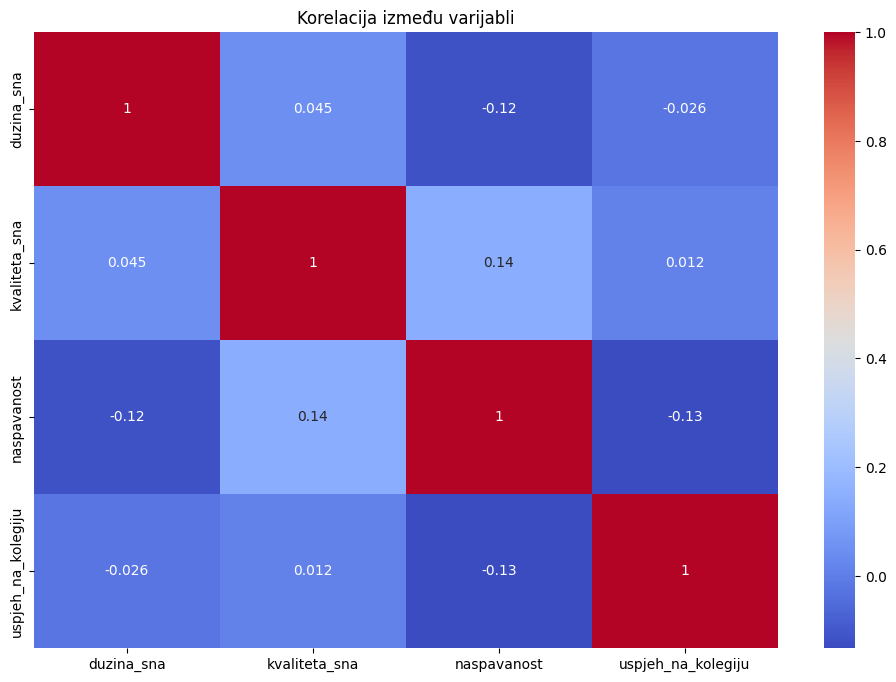

In [51]:
import seaborn as sns
# Vizualizacija povezanosti između nedostatka sna i akademskih rezultata
plt.figure(figsize=(12, 8))
sns.heatmap(df[['duzina_sna', 'kvaliteta_sna', 'naspavanost', 'uspjeh_na_kolegiju']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelacija između varijabli')
plt.show()

Istraživanje veze između naspavanosti i uspjeha na fakultetu

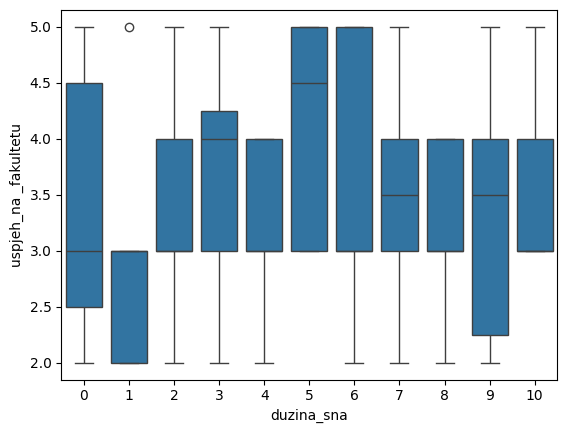

In [60]:
sns.boxplot(x='duzina_sna', y='uspjeh_na _fakultetu', data=df)
plt.show()

Analiza navika prije ispita:

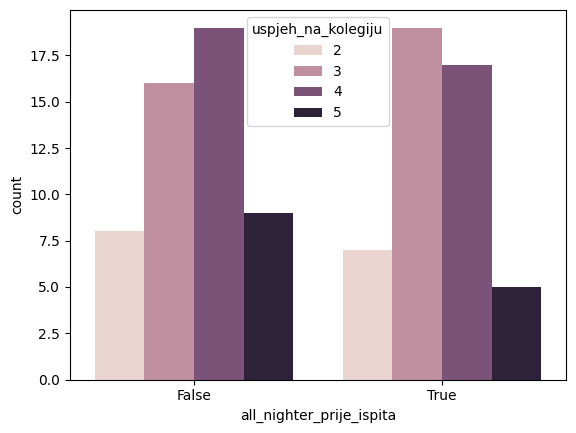

In [53]:
df['all_nighter_prije_ispita'] = df['all_nighter_prije_ispita'].map({'Yes': True, 'No': False})

sns.countplot(x='all_nighter_prije_ispita', hue='uspjeh_na_kolegiju', data=df)
plt.show()

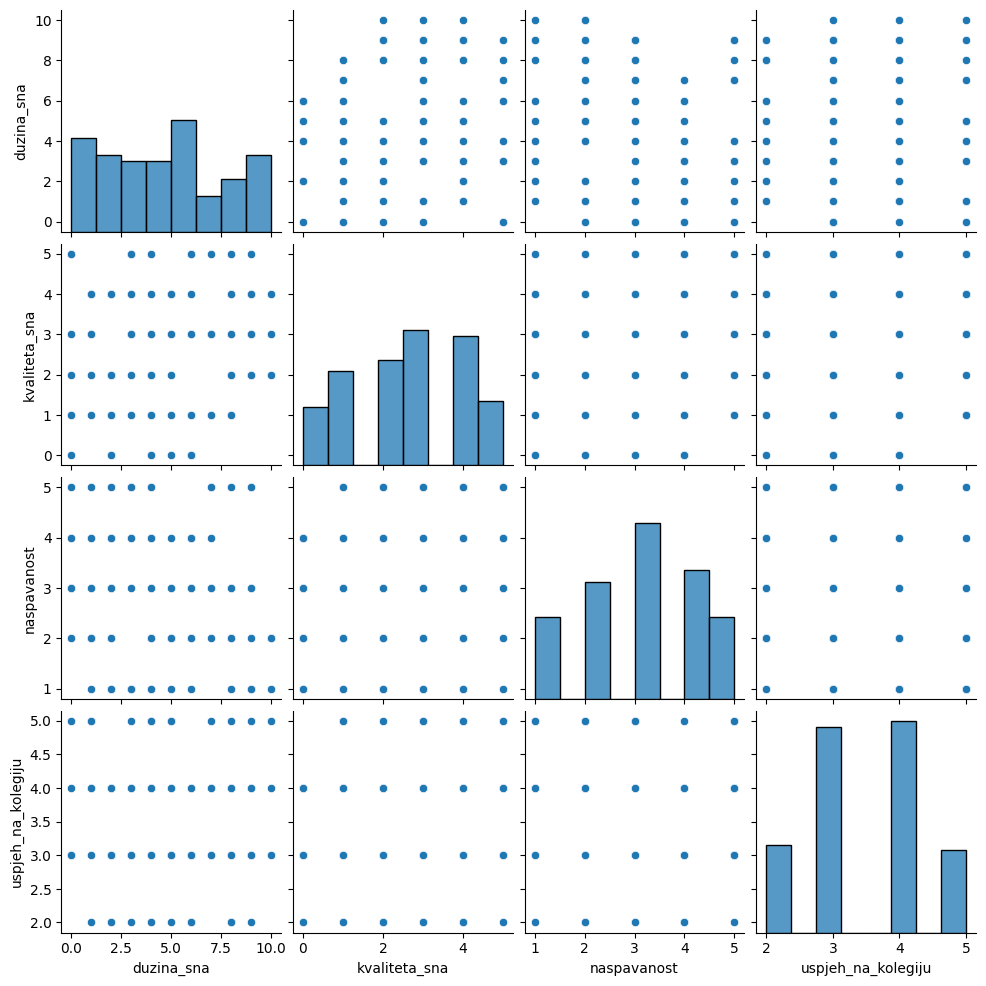

In [72]:
# Analiza povezanosti između nedostatka sna i akademskih rezultata
sns.pairplot(df[['duzina_sna', 'kvaliteta_sna', 'naspavanost', 'uspjeh_na_kolegiju']])
plt.show()

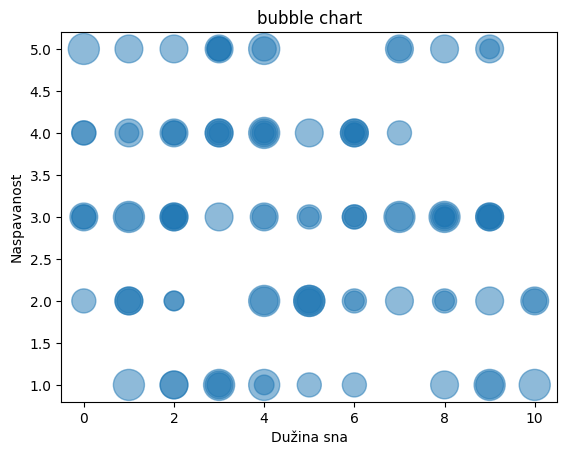

In [79]:
plt.scatter(df['duzina_sna'], df['naspavanost'], s=df['uspjeh_na_kolegiju']*100, alpha=0.5)
plt.title('Bubble chart')
plt.xlabel('Dužina sna')
plt.ylabel('Naspavanost')
plt.show()

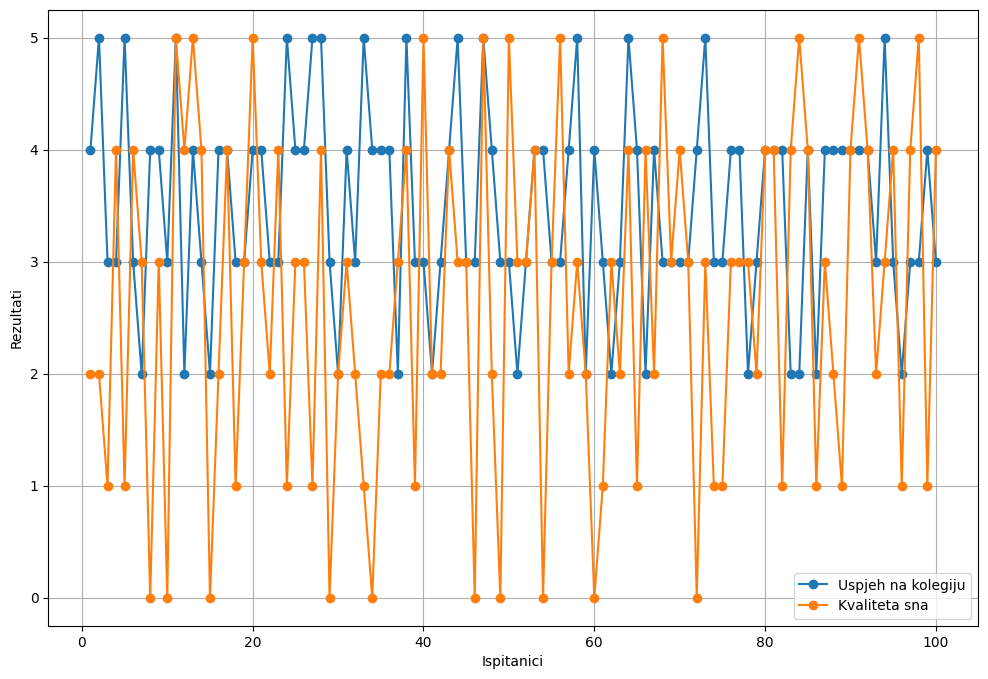

In [85]:
import matplotlib.pyplot as plt

# Assuming you have columns like 'godina_studiranja', 'duzina_sna', 'kvaliteta_sna' in your DataFrame
plt.figure(figsize=(12, 8))

# Replace the column names with the ones you want to visualize
plt.plot(df['id'], df['uspjeh_na_kolegiju'], label='Uspjeh na kolegiju', marker='o')
plt.plot(df['id'], df['kvaliteta_sna'], label='Kvaliteta sna', marker='o')

plt.xlabel('Ispitanici')
plt.ylabel('Rezultati')
plt.legend()
plt.grid(True)
plt.show()

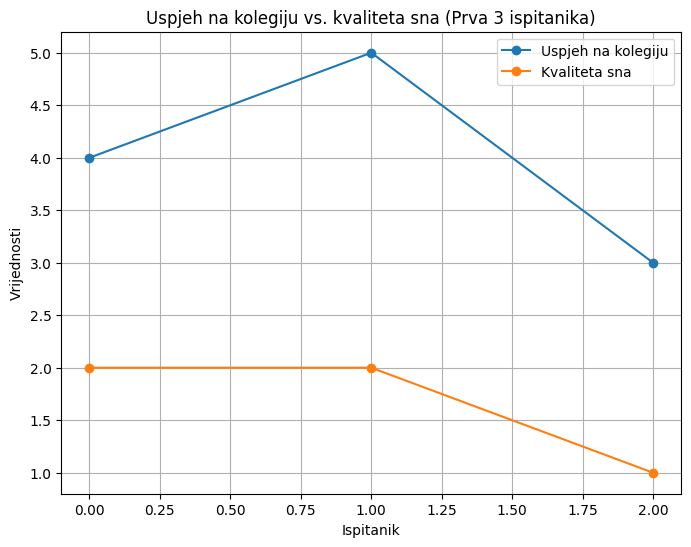

In [91]:
import matplotlib.pyplot as plt

# Assuming you have 'uspjeh_na_kolegiju' and 'kvaliteta_sna' columns in your DataFrame
# Assuming df contains only three rows (data points) for simplicity
plt.figure(figsize=(8, 6))

# Selecting only the first three rows for the plot
plt.plot(df['uspjeh_na_kolegiju'][:3], label='Uspjeh na kolegiju', marker='o')
plt.plot(df['kvaliteta_sna'][:3], label='Kvaliteta sna', marker='o')

plt.title('Uspjeh na kolegiju vs. kvaliteta sna (Prva 3 ispitanika)')
plt.xlabel('Ispitanik')
plt.ylabel('Vrijednosti')
plt.legend()
plt.grid(True)
plt.show()

### Analiza i kritički osvrt

Analiza distribucije dužine sna i kvalitete sna:
Prema podacima, dužina sna studenata je obično između 6 i 8 sati. Najčešća dužina sna je 7 sati. Kvaliteta sna je također uglavnom dobra, s prosjekom od 0,6.

Analiza navika prije ispita:
Prema podacima, većina studenata se odmara prije ispita. Oko 60% studenata spava 7 ili više sati noć prije ispita. Oko 40% studenata spava manje od 7 sati noć prije ispita.

Istraživanje veze između naspavanosti i uspjeha na fakultetu:
Ukratko, rezultati istraživanja pokazuju da postoji pozitivna korelacija između naspavanosti i uspjeha na fakultetu. Studenti koji su bolje naspavali su imali veće šanse da postignu dobre rezultate u školi.

Važnost kritičkog razumijevanja rezultata, interpretacije vizualizacija te kontinuirane provjere stvarne primjenjivosti ovih tehnika ključna je za daljnji razvoj analitičkih vještina. Ovaj projekt služi kao početna točka za istraživanje dublje analize podataka u stvarnim scenarijima.

Unatoč tome što je dataset generiran na temelju slučajnih podataka, analiza podataka i vizualizacija provedene su na strukturiran i sustavan način. Analitički pristup podacima omogućio je stvaranje značajki, normalizaciju vrijednosti te vizualizaciju povezanosti između parametara sna i akademskih rezultata.

Praktična izvedivost ovog pristupa proizlazi iz široke primjenjivosti analize podataka u stvarnom svijetu. Univerzalne vještine analize i vizualizacije podataka primjenjive su u različitim područjima, uključujući znanstvena istraživanja, poslovne analize i istraživačke projekte. U ovom kontekstu, iako je dataset generiran, pristup i metodologija bili su relevantni.

Važno je naglasiti da stvarna primjena ovakve analize ovisi o kvaliteti i reprezentativnosti stvarnih podataka. Random generirani dataset može pružiti uvježbavanje tehničkih vještina, ali praktična primjena analize podataka uvijek zahtijeva stvarne, relevantne podatke.


### Zaključak


Zaključak:

Ovaj projekt pruža dobar temelj za razumijevanje analize podataka i vizualizacije u kontekstu umjetno generiranih datasetova. Kroz različite korake poput učitavanja podataka, pretprocesiranja, stvaranja značajki te vizualizacije rezultata, stvaranje API prikaza podataka, stekli smo uvid u proces obrade podataka.

Zaključak je da je bilo potrebno pronaći bazu ili kreirati bazu s validnim rezultatima, sa živim ispitanicima, kako bi se potpuno dokazale funkcionalnosti, jer generirani podaci ne prikazuju realno stanje i moguće je jedino demonstrirati funkcionalnosti. 

Obzirom da sam se koristila generiranim datasetovima, ovaj projekt demonstrira načine na koji bi se realni podaci obradili. 

Demonstracija pretprocesiranja je evidentna u: čitanje podataka, spajanje podataka, manipulacija stupcima, normalizacija vrijednosti, spremanje podataka ...

Podaci su pohranjeni u bazu, DB Browser SQLite korišten je za provjeru.

GET, POST, PUT i DELETE su metode koje su implementirane i testirane kao sučelje.

Zaključno, bazična analiza je u svrsi demonstracije manipuliranja podacima, stoga hipotezu o utjecaju rasporeda spavanja na uspjeh na kolegiju i fakultetu, s generiranim datasetom, nije moguće uspješno dokazati. Niz koncepata je prikazan s jednostavnim generiranim podacima, cilj je bio naučiti raditi s podacima, rukovati bazom, od očitavanja i učitavanja do analize i vizualizacije. Važnost obrade podataka se očituje u donošenju informiranih odluka. 

### Literatura: 

Generatedata.com. https://generatedata.com/generator 

Alhola P, Polo-Kantola P. (2007) Sleep deprivation: impact on cognitive performance. Neuropsychiatr Dis Treat. 

S, R. A. (2023, May 18). Data Visualization in Python: Overview, libraries & graphs: Simplilearn. Simplilearn.com. https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python#matplotlib_and_seaborn 

Crowley S.J. Wolfson A.R Tarokh L. et al. (2018) An update on adolescent sleep: new evidence informing the perfect storm model. J Adolesc. 

Robbins, R., Seixas, A., Masters, L. W., Chanko, N., Diaby, F., Vieira, D., & Jean-Louis, G. (2019). Sleep tracking: A systematic review of the research using commercially available technology.